In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from portfolio_management.beta_estimation import estimate_dynamic_beta_and_alpha, historical_rolling_beta
TICKER = "BA"

df:pd.DataFrame = yf.download(f"SPY {TICKER}", period="10y")

df = df.dropna().loc["2010-01-01":]

c:\_sharedFS\Ecole\Cross-Asset-Investment-Solutions\Cross-Asset-Investment-Solutions\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\_sharedFS\Ecole\Cross-Asset-Investment-Solutions\Cross-Asset-Investment-Solutions\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed


In [2]:
df = (df["Close"].pct_change().fillna(0) + 1).cumprod()
df

Ticker,BA,SPY
Date,,
2014-03-10,1.000000,1.000000
2014-03-11,0.990385,0.995057
2014-03-12,0.980613,0.995323
2014-03-13,0.960596,0.984162
2014-03-14,0.970210,0.981399
...,...,...
2024-03-04,1.580424,2.722683
2024-03-05,1.585152,2.695472
2024-03-06,1.584049,2.709130


In [3]:
estimated_alpha, estimated_beta = estimate_dynamic_beta_and_alpha(df["SPY"].pct_change().fillna(0).to_numpy(),
                                                                  df[TICKER].pct_change().fillna(0).to_numpy())

estimated_beta_bench = historical_rolling_beta(df["SPY"].pct_change().fillna(0).to_numpy(),
                                                                  df[TICKER].pct_change().fillna(0).to_numpy())

## Benchmark beta

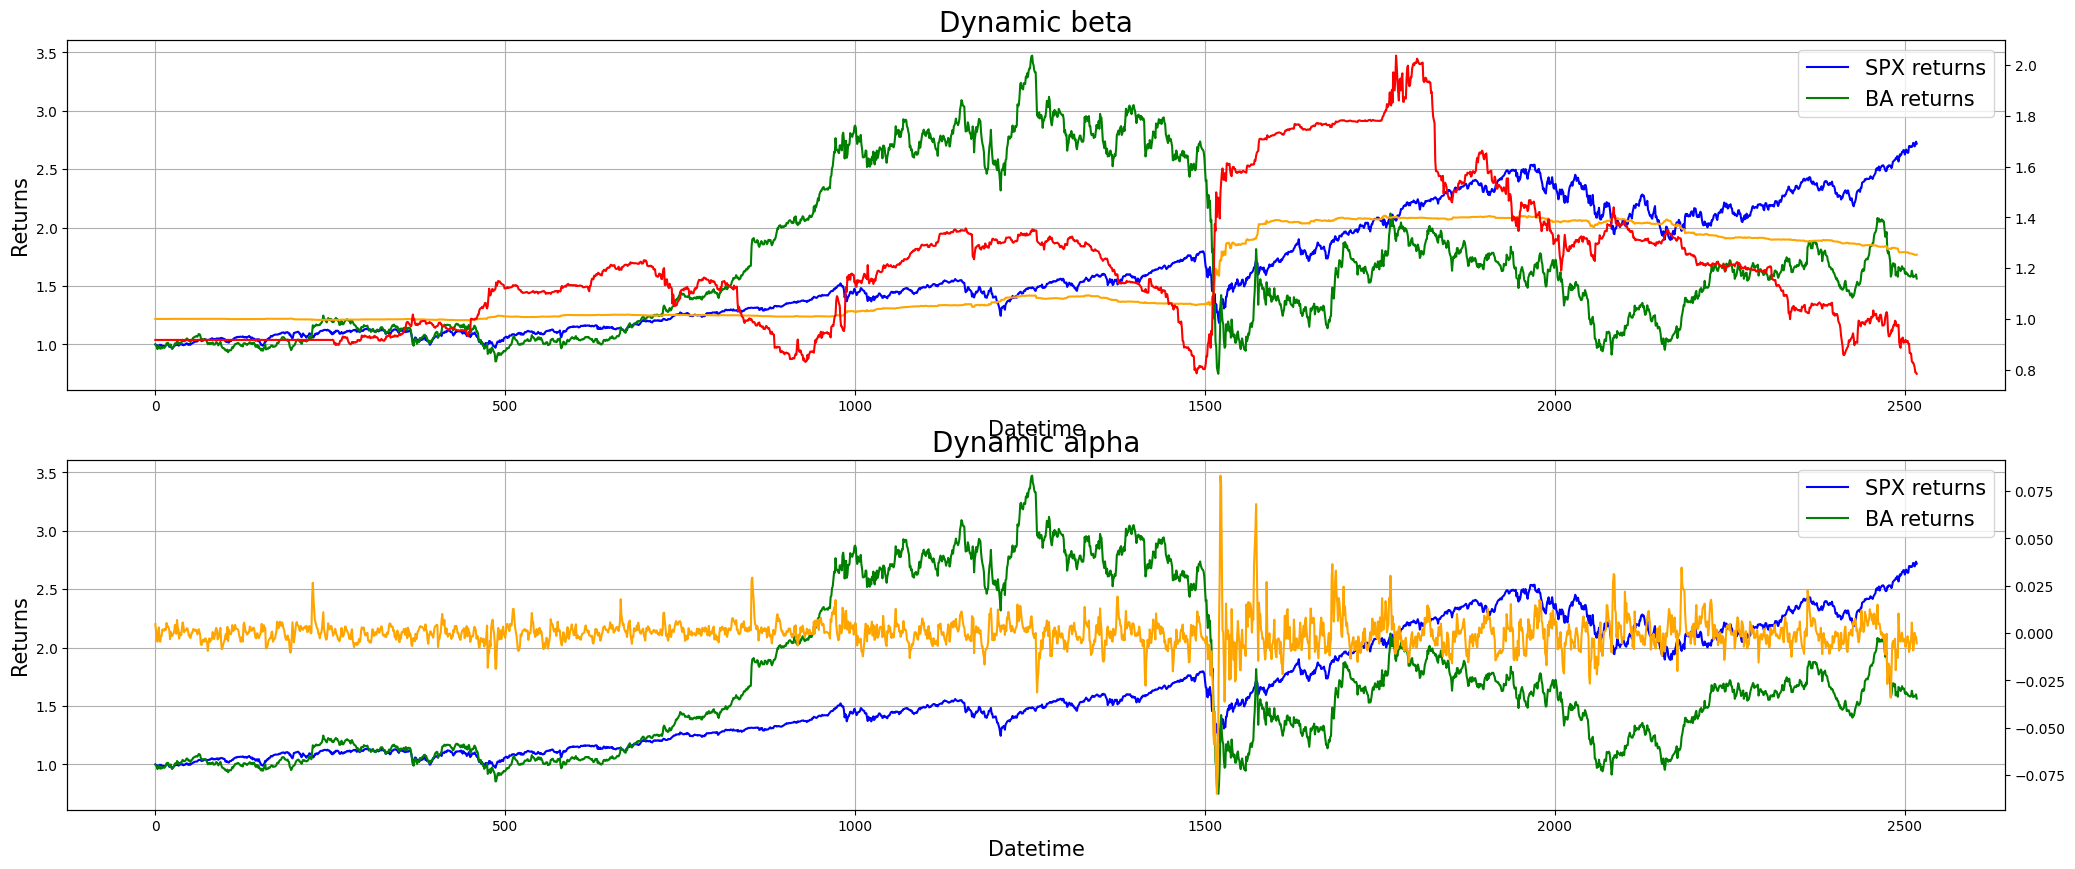

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(25, 10))
ax_l = ax[0].twinx()
ax_l.plot(
    np.array(range(df.SPY.shape[0])),
    estimated_beta,
    label="Dynamic betas",
    color="orange",
)
ax_l.plot(
    np.array(range(df.SPY.shape[0])),
    estimated_beta_bench,
    label="Dynamic betas using past value rolling measure",
    color="red",
)

ax[0].plot(np.array(range(df.SPY.shape[0])), df["SPY"], label="SPX returns", color="blue")
ax[0].plot(np.array(range(df.SPY.shape[0])), df[TICKER], label=f"{TICKER} returns", color="green")
ax[0].set_xlabel("Datetime", fontsize=15)
ax[0].set_ylabel("Returns", fontsize=15)
ax[0].set_title("Dynamic beta", fontsize=20)
# ax.set_yscale('log')
ax[0].grid()
ax[0].legend(fontsize=15)

ax_l = ax[1].twinx()
ax_l.plot(
    np.array(range(df.SPY.shape[0])),
    estimated_alpha,
    label="Dynamic alphas",
    color="orange",
)
ax[1].plot(np.array(range(df.SPY.shape[0])), df["SPY"], label="SPX returns", color="blue")
ax[1].plot(np.array(range(df.SPY.shape[0])), df[TICKER], label=f"{TICKER} returns", color="green")
ax[1].set_xlabel("Datetime", fontsize=15)
ax[1].set_ylabel("Returns", fontsize=15)
ax[1].set_title("Dynamic alpha", fontsize=20)
# ax.set_yscale('log')
ax[1].grid()
ax[1].legend(fontsize=15)